# 5.1

## a)

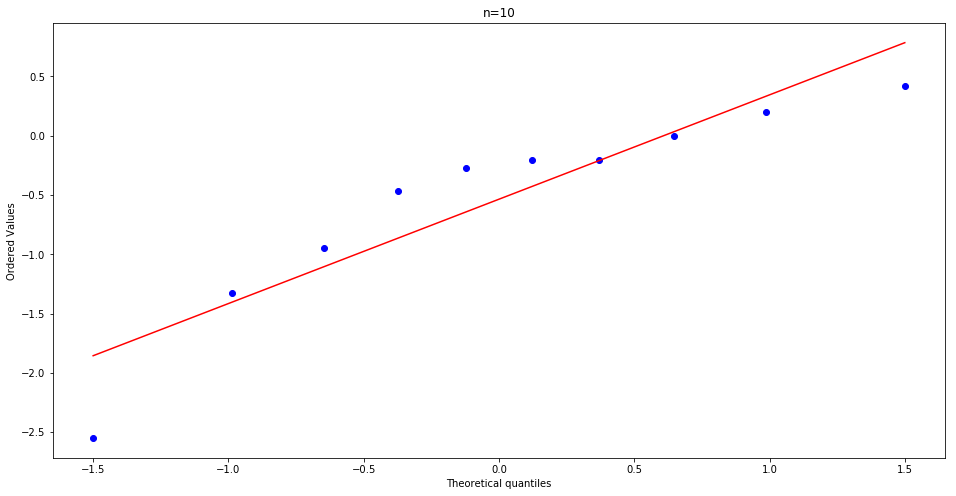

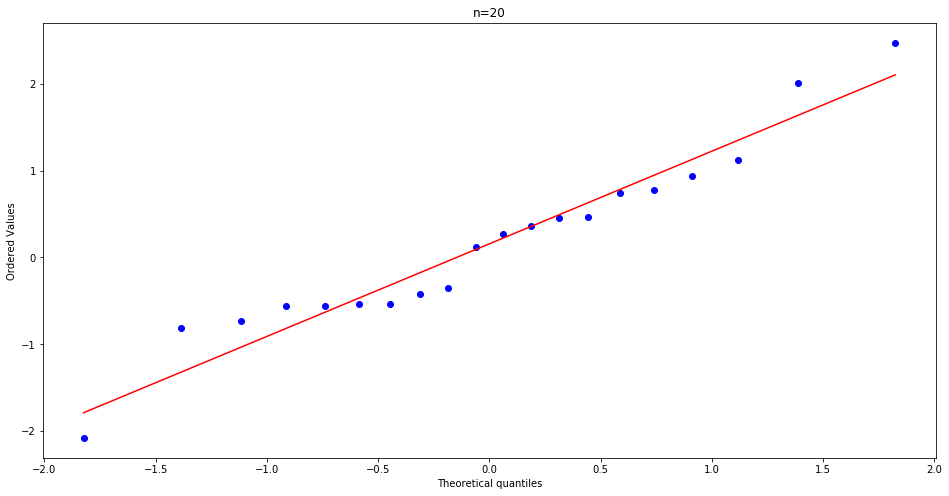

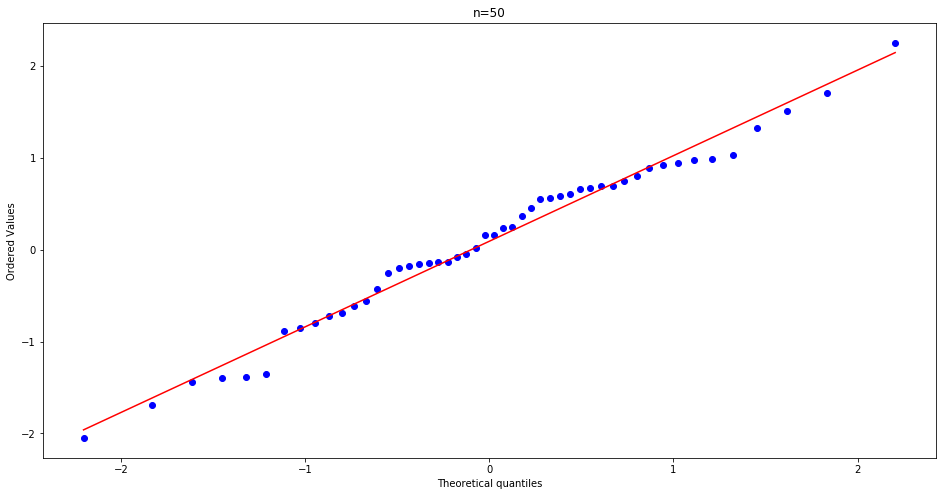

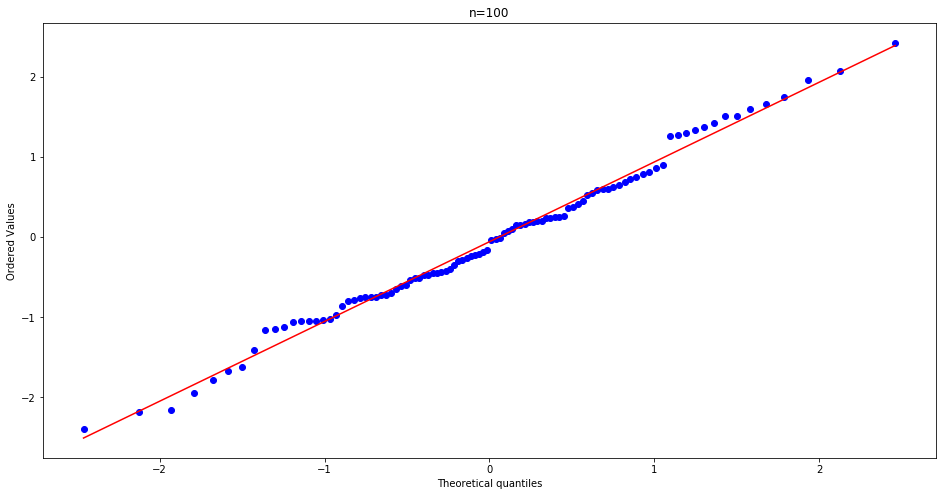

In [4]:
import numpy as np
import scipy.stats as st
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [16, 8]

for n in [10, 20, 50, 100]:
    x = st.norm.rvs(size=n)
    st.probplot(x, plot=plt)
    plt.title('n={:d}'.format(n))
    plt.show()

## b)

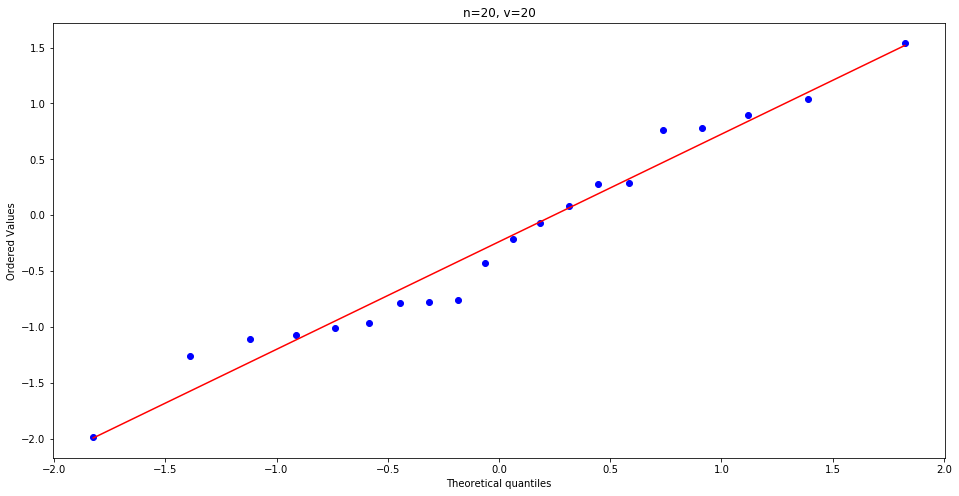

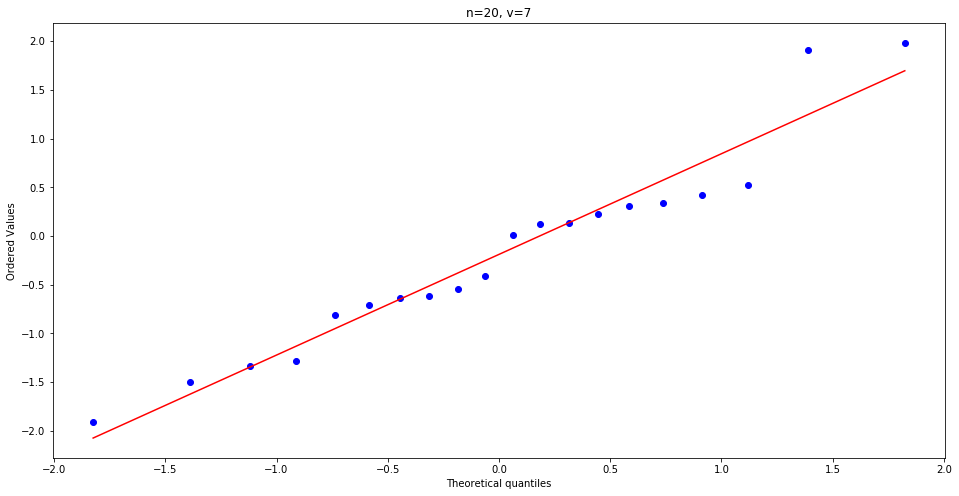

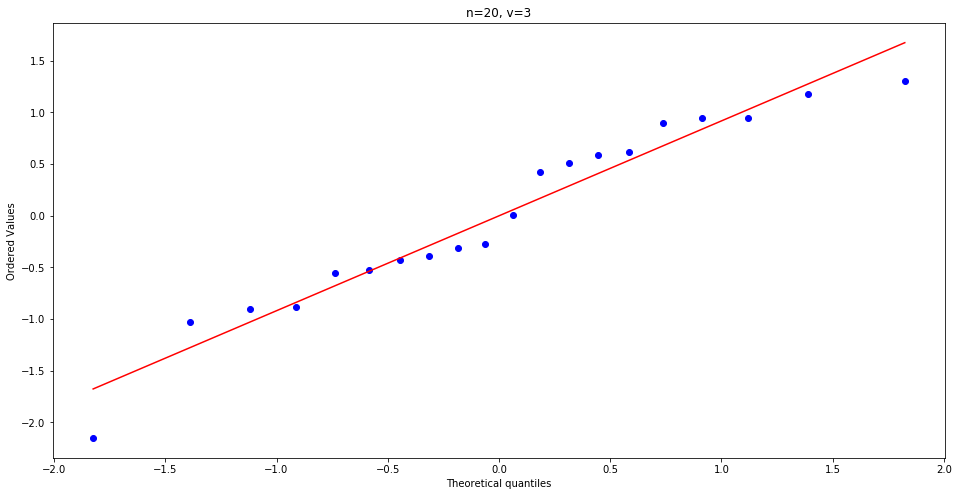

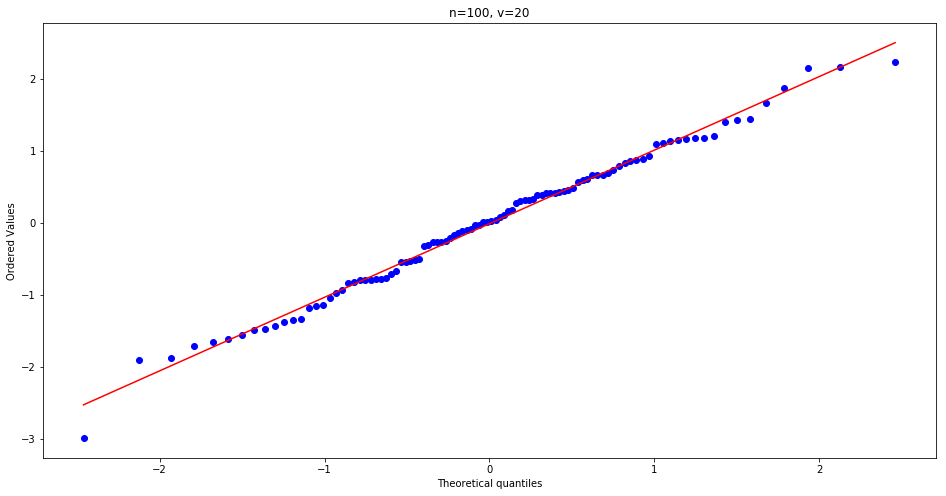

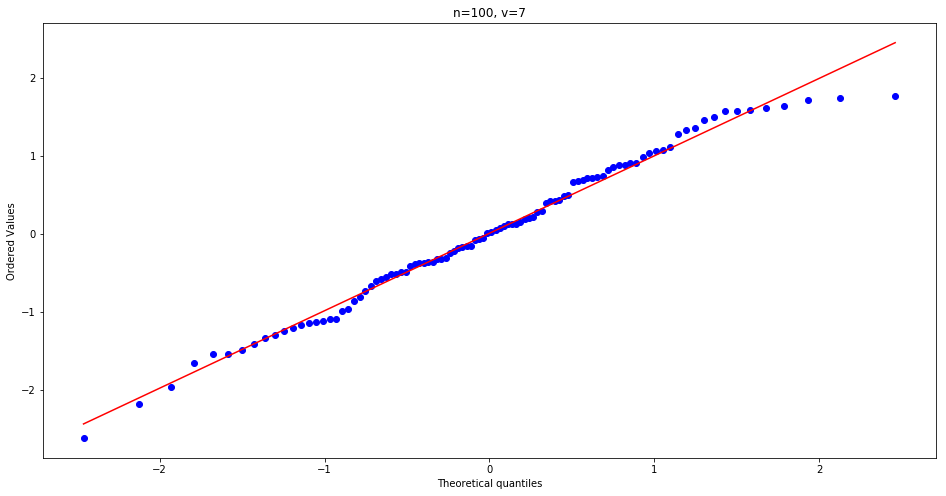

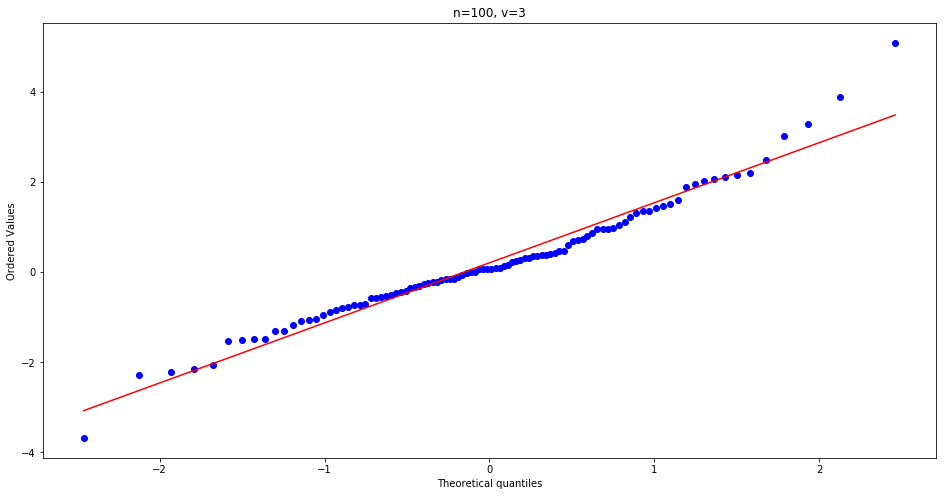

In [5]:
for n in [20, 100]:
    for v in [20, 7, 3]:
        title = 'n={:d}, v={:d}'.format(n, v)
        x = st.t.rvs(size=n, df=v)
        st.probplot(x, plot=plt)
        plt.title(title)
        plt.show()

## c)

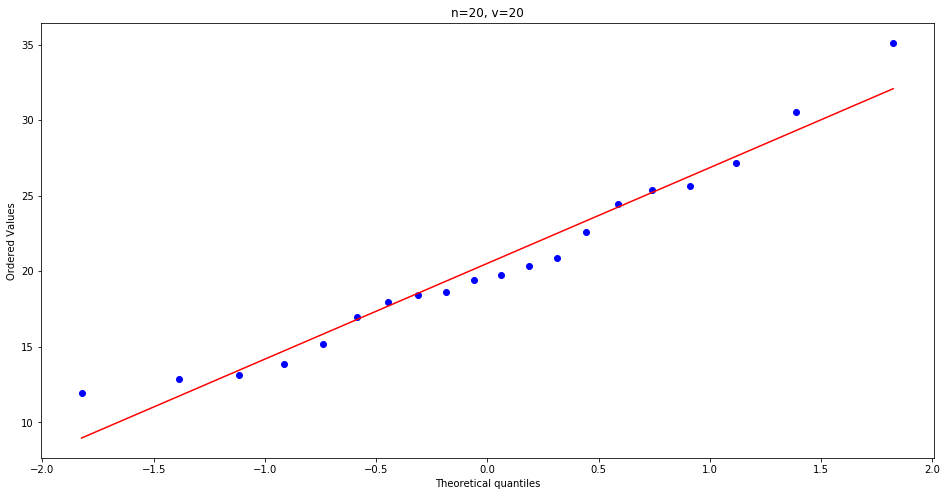

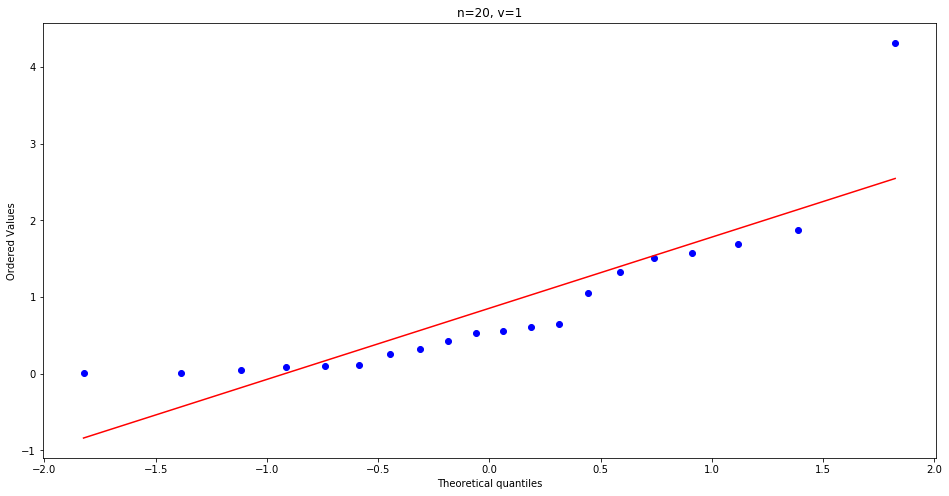

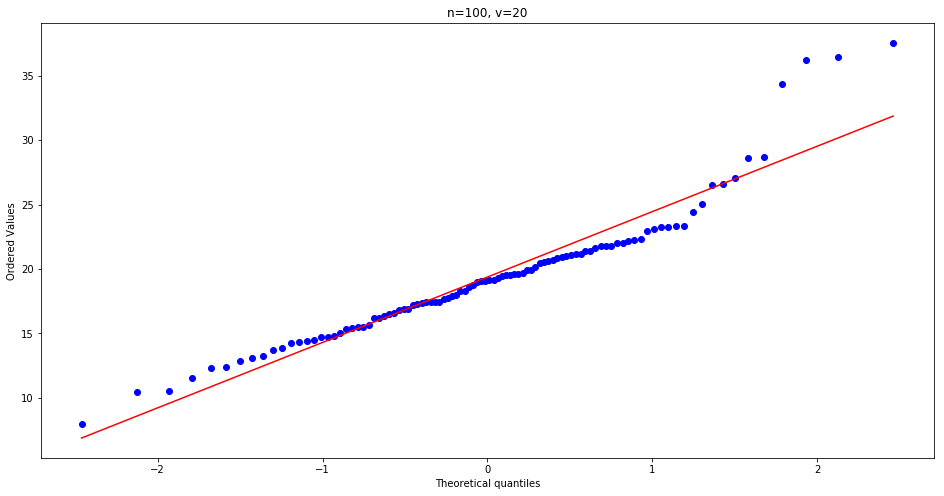

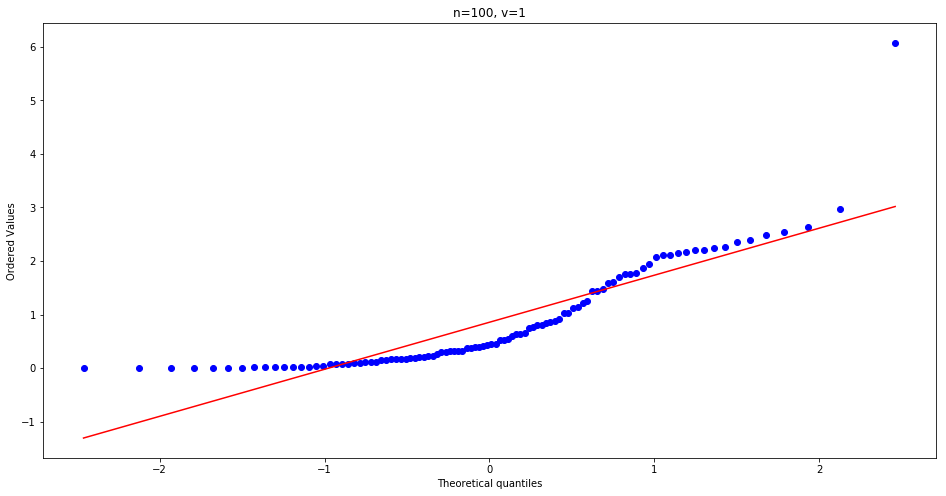

In [7]:
for n in [20, 100]:
    for v in [20, 1]:
        title = 'n={:d}, v={:d}'.format(n, v)
        x = st.chi2.rvs(size=n, df=v)
        st.probplot(x, plot=plt)
        plt.title(title)
        plt.show()

# 5.2

## a)

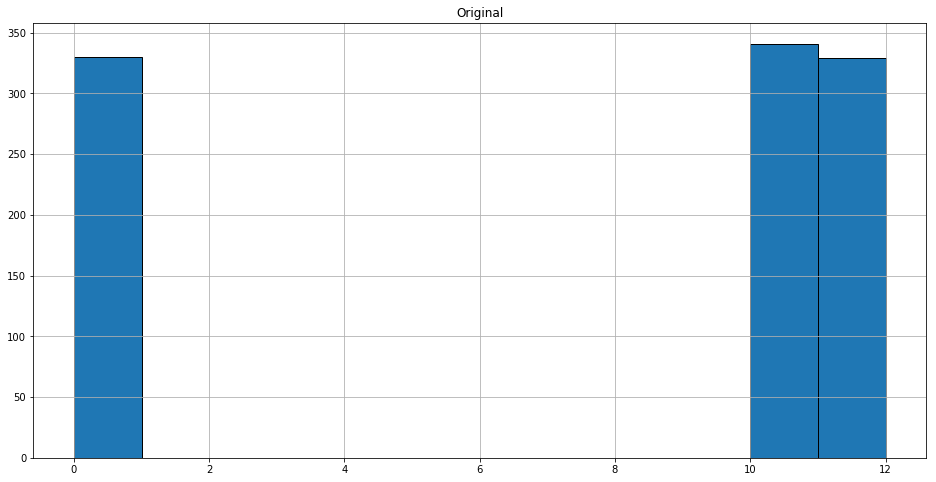

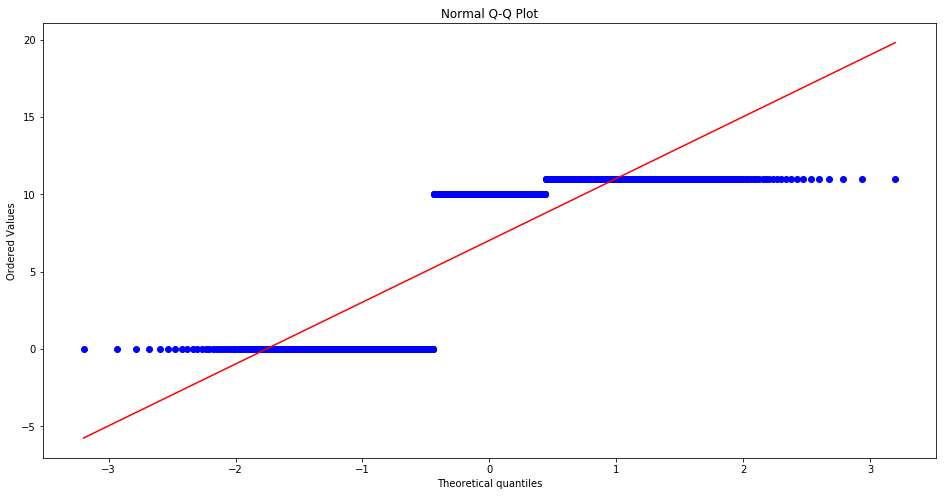

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = [16, 8]

values = np.array([0, 10, 11])
sim = pd.Series(np.random.choice(values, size=1000, replace=True))

sim.hist(bins=[0, 1, 10, 11, 12], edgecolor='black')
plt.title('Original')
plt.show()

st.probplot(sim, plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

## b)

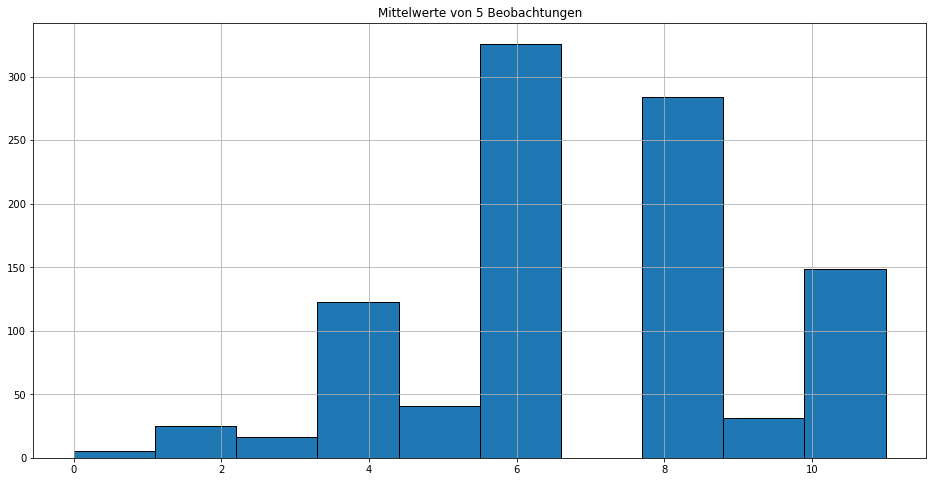

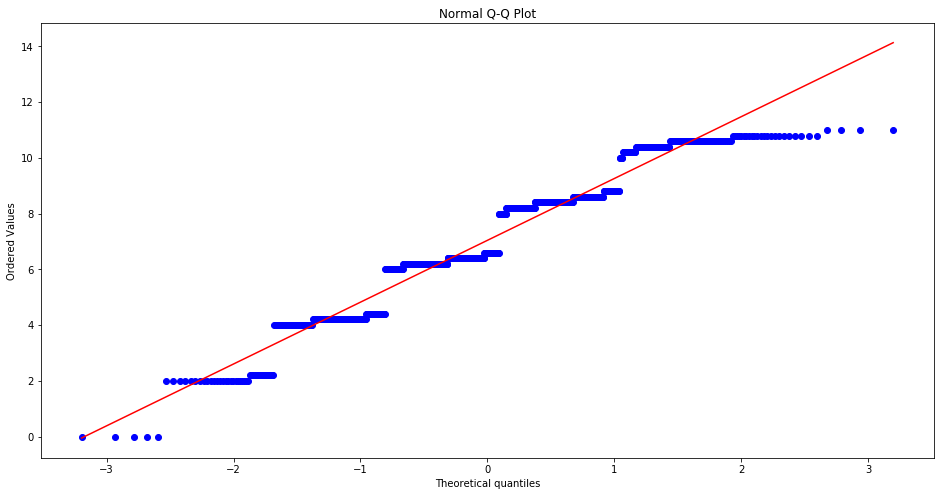

In [8]:
n = 5
sim = np.random.choice(values, size=n*1000, replace=True)
sim = pd.DataFrame(np.reshape(sim, (n, 1000)))
sim_mean = sim.mean()

sim_mean.hist(edgecolor='black')
plt.title('Mittelwerte von 5 Beobachtungen')
plt.show()

st.probplot(sim_mean, plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

## c)

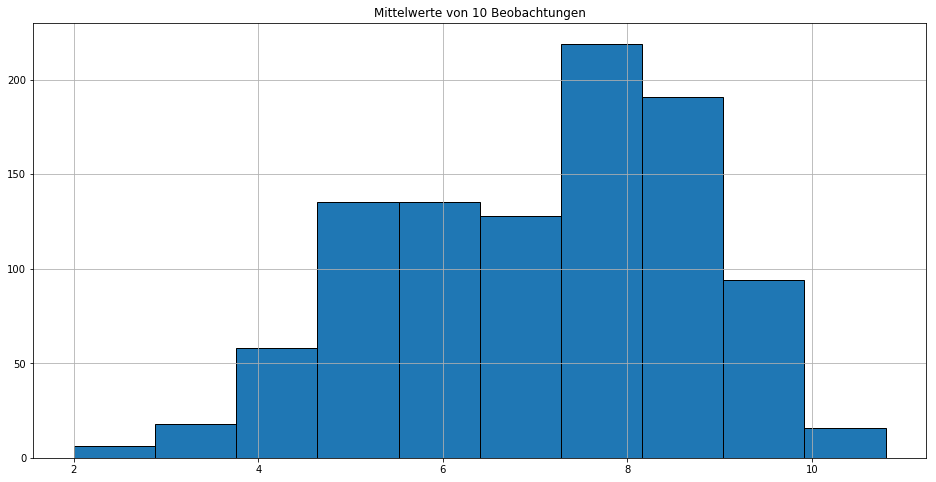

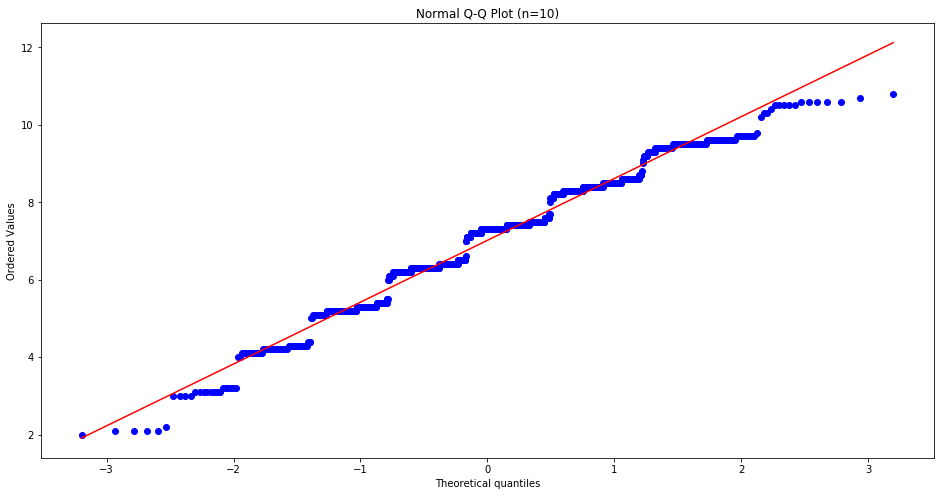

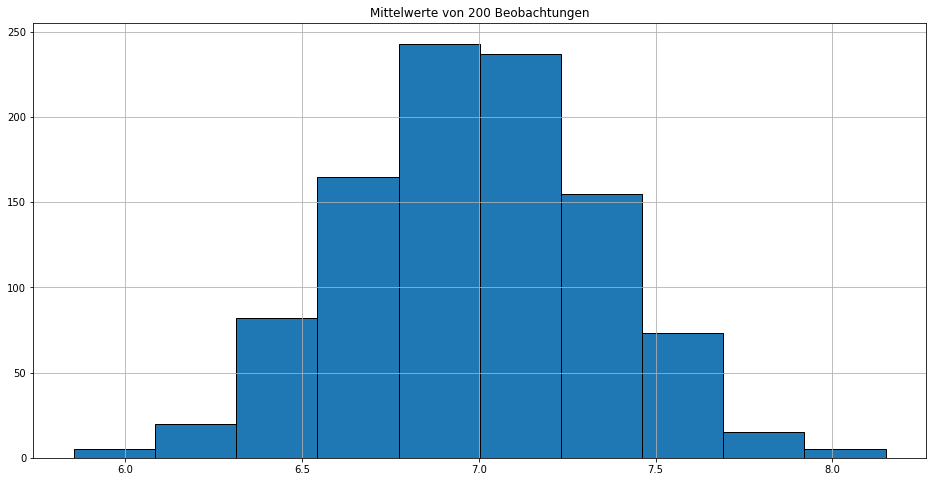

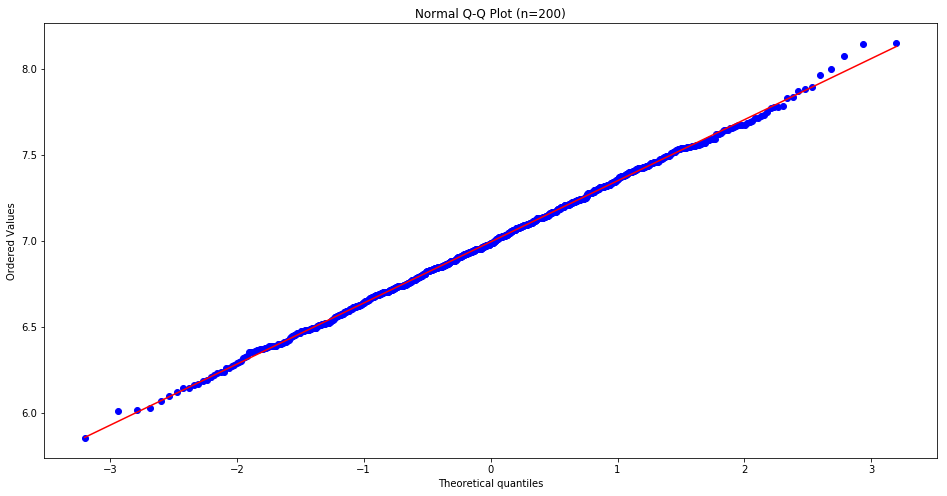

In [9]:
for n in [10, 200]:
    sim = np.random.choice(values, size=n*1000, replace=True)
    sim = pd.DataFrame(np.reshape(sim, (n, 1000)))
    sim_mean = sim.mean()

    sim_mean.hist(edgecolor='black')
    plt.title('Mittelwerte von {:d} Beobachtungen'.format(n))
    plt.show()

    st.probplot(sim_mean, plot=plt)
    plt.title('Normal Q-Q Plot (n={:d})'.format(n))
    plt.show()

Da $ \overline{X}_n $ für grosse $ n $ gut auf die Gerade des QQ-Plots passt, kann man annehmen, dass es normalverteilt ist:

$$ \overline{X}_n = \frac{U_1+U_2+U_3+\dots+U_n}{n} \sim \mathcal{N} $$

Der Erwartungswert der Zufallsvariable $ \overline{X}_n $ entspricht dem Median $ \mu $:

$$ \underline{\mu} = E(\overline{X}_n) = \frac{1}{n} \sum_{i=1}^n E(U_i) = E(U_i) = \frac{0+10+11}{3} = \underline{7} $$

Die Varianz der Zufallsvariable $ \overline{X}_n $ entspricht dem Quadrat der Standardabweichung $ \sigma_{\overline{X}_n}^2 $:

$$ \sigma_{\overline{X}_n}^2 = Var(\overline{X}_n) = \frac{1}{n^2} \sum_{i=1}^{n} Var(U_i) = \frac{Var(U_i)}{n} = \frac{1}{n} (\frac{(0-7)^2+(10-7)^2+(11-7)^2}{3}) = \frac{24.67}{n} $$

Für $ n=200 $ ergibt dies:

$$ \underline{\sigma_{\overline{X}_n}} = \sqrt{\frac{24.67}{200}} = \underline{0.3512} $$

$$ \underline{\underline{\overline{X}_n \sim \mathcal{N}(7, 0.3512^2)}} $$

# 5.3

In [19]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [16, 8]

iron = pd.read_csv('iron.csv', sep=' ', index_col=False)

## a)

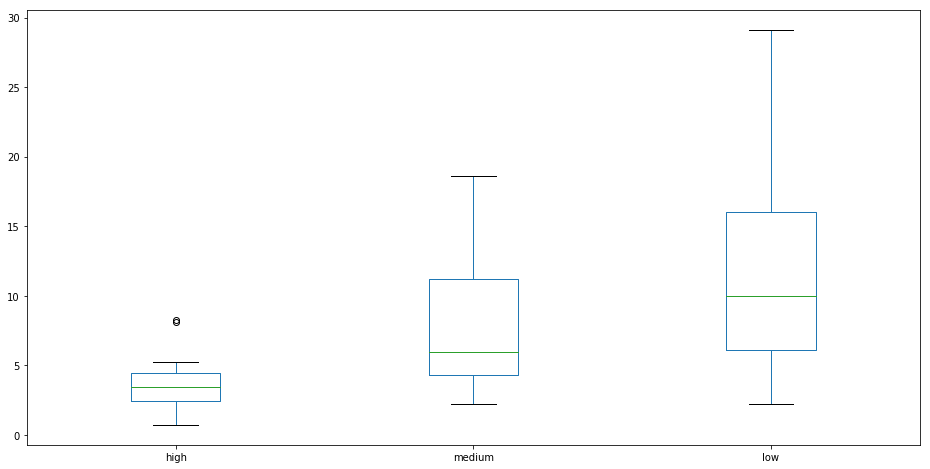

In [28]:
iron.plot(kind='box')
plt.show()

- Bei der hohen Konzentration lässt sich auf der linken Seite (mit etwas Phantasie) eine Tendenz zur Normalverteilung erkennen.
- Bei der mittleren Konzentration gibt es eine Tendenz zu tiefen Werten.
- Bei der tiefen Konzentration lässt sich keine klare Tendenz feststellen.

## b)

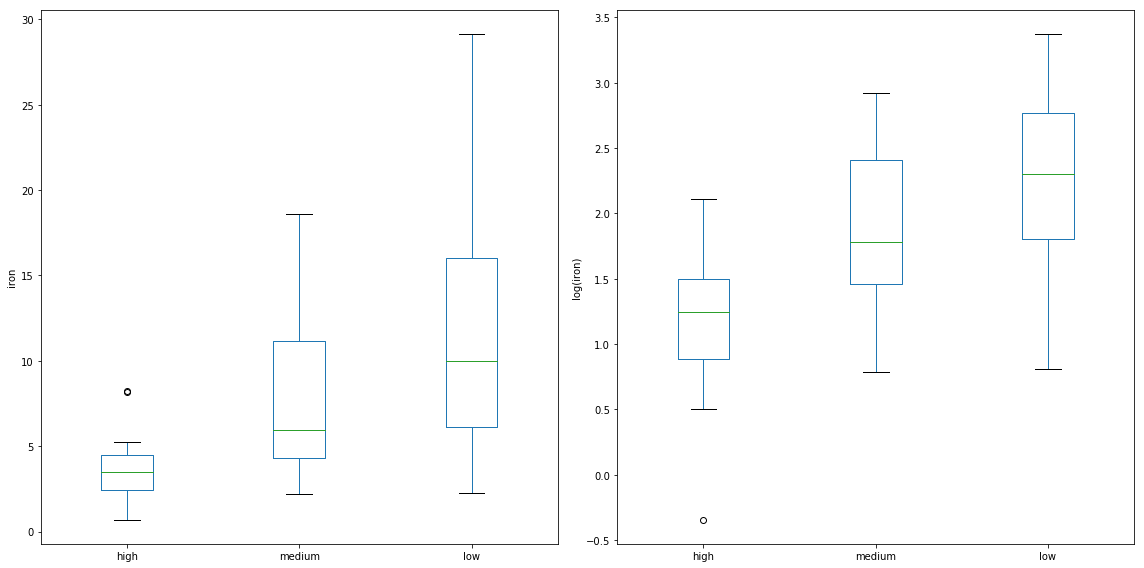

In [32]:
plt.subplot(1, 2, 1)
iron.plot(kind='box', ax=plt.gca()) # gca(): get current axes
plt.ylabel('iron')

plt.subplot(1, 2, 2)
np.log(iron).plot(kind='box', ax=plt.gca())
plt.ylabel('log(iron)')

plt.tight_layout()
plt.show()

Durch die Logarithmus-Transformation sind die Werte ausgeglichener geworden. Die Spannbreiten haben abgenommen.

## c)

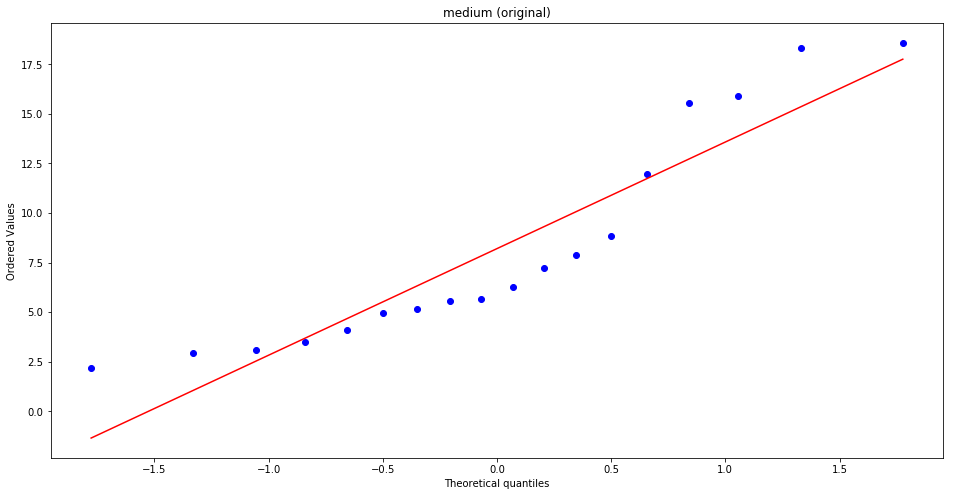

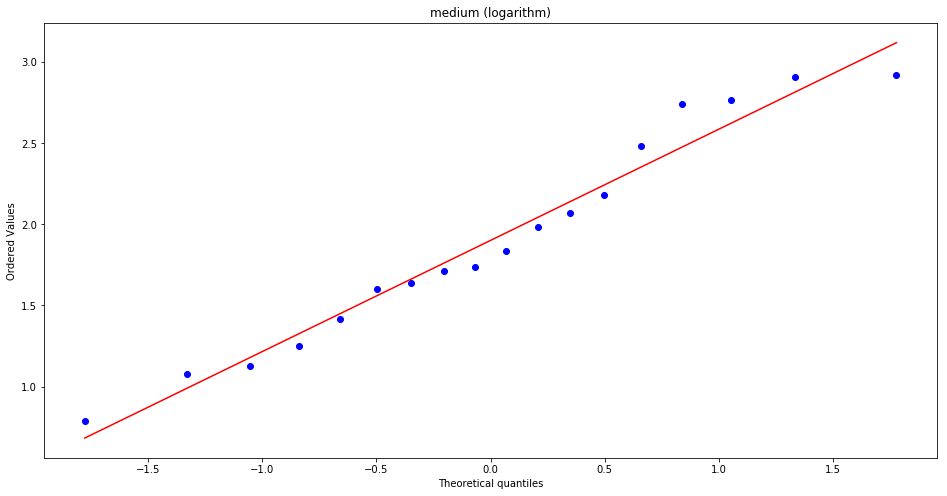

In [21]:
st.probplot(iron['medium'], plot=plt)
plt.title('medium (original)')
plt.show()

st.probplot(np.log(iron['medium']), plot=plt)
plt.title('medium (logarithm)')
plt.show()

Die logarithmierten Werte passen besser auf eine Normalverteilung.

## d)

Annahme: $ X \sim \mathcal{N}(\mu, \sigma^2) $

Gesucht: $ \mu, \sigma, P(X>10\%) $ (mehr als 10% Eisen zurückbehalten)

In [33]:
mean = iron['medium'].mean()
std = iron['medium'].std()
print('X~N({:.3f}, {:.3f}^2)'.format(mean, std))

p = 1 - st.norm.cdf(10, loc=mean, scale=std)
print('P(X>10%)={:.4f}'.format(p))

X~N(8.204, 5.447^2)
P(X>10%)=0.3708


## e)

(Zusatzaufgabe)

In [37]:
iron_log = np.log(iron['medium'])
mean = iron_log.mean()
std = iron_log.std()
print('X~log N({:.3f}, {:.3f}^2)'.format(mean, std))

p = 1 - st.norm.cdf(np.log(10), loc=mean, scale=std)
print('P(X>10%)={:.4f}'.format(p))

X~log N(1.901, 0.659^2)
P(X>10%)=0.2711


# 5.4

15 Fische in 2 Stunden (Poisson-Prozess), mittlere verstrichene Zeit zwischen Fischfängen: $ \frac{120}{15} = 8 $ Minuten

## a)

gesucht: $ P(T>12min) $

Wahrscheinlichkeit für einen Fischfang nach $ t $ Minuten: exponentialverteilt!

$$ f(t) = \lambda \cdot e^{-\lambda t} $$

**Momentenmethode: Erwartungswert der Exponentialverteilung mit dem beobachteten Wert für die mittlere Zeit gleichsetzen:**

$$ E(T) = \frac{1}{\lambda} = 8 \Leftrightarrow \lambda = \frac{1}{8} $$

Wahrscheinlichkeit:

$$ P(T>12) = 1-P(T \leq 12) $$

Kumulative Verteilungsfunktion **der Exponentialverteilung**:

$$ F(t) = 1-e^{-\lambda t} $$

Eingesetzt:

$$ P(T>12) = 1 - (1 - e^{-\lambda t}) = e^{-\lambda t } $$

Mit $ t=12 $ und $ \lambda = \frac{1}{8} $:

$$ \underline{\underline{P(T>12)}} = e^{\frac{-12}{8}} = \underline{\underline{0.2231}} $$

## b)

1 Fisch alle 8 Minuten, $t=12$ Minuten:

$$ \frac{1}{8} = \frac{\lambda}{12} \Leftrightarrow \lambda = \frac{12}{8} = 1.5 $$

D.h. 1.5 Fische alle 12 Minuten sind zu erwarten.

Wahrscheinlichkeitsdichtefunktion der Poisson-Verteilung:

$$ P(X=x) = e^{-\lambda} \frac{\lambda^x}{x!} $$

Mit $ \lambda=1.5 $ und $ x=2 $:

$$ \underline{\underline{P(X=2)}} = e^{-1.5} \frac{1.5^2}{2!} = \underline{\underline{0.251}} $$

## c)

Wartezeiten zwischen den Fischfängen folgen der Exponentialverteilung (kumulative Verteilungsfunktion), für $ x \geq 0 $:

$$ F(x) = 1 - e^{-\lambda x} $$

Die theoretischen Quantile $ q_{\alpha} $ lassen sich über die Umkehrfunktion berechnen:

$$ F(q_{\alpha}) = \alpha \Leftrightarrow q_{\alpha} = F^{-1}(\alpha) $$

Diese wird berechnet, indem die Gleichung nach $ q_{\alpha} $ aufgelöst wird:

$$ \alpha = 1 - e^{-\lambda q_{\alpha}} \quad \big| + e^{-\lambda q_{\alpha}} \quad -\alpha $$

$$ e^{-\lambda q_{\alpha}} = 1 - \alpha \quad \big| log $$ 

$$ -\lambda q_{\alpha} log(e) = log(1-\alpha) \quad \big| log(e)=1 $$

$$ -\lambda q_{\alpha} = log(1-\alpha) \quad \big| : -\lambda $$

$$ \underline{q_{\alpha} = \frac{1}{-\lambda} log(1-\alpha)} $$

Die empirischen $ \alpha_k $-Quantile werden folgendermassen berechnet:

$$ \alpha_k = \frac{k-0.5}{n} $$

Die _geordneten_ Beobachtungen werden als folgende Punkte eingezeichnet:

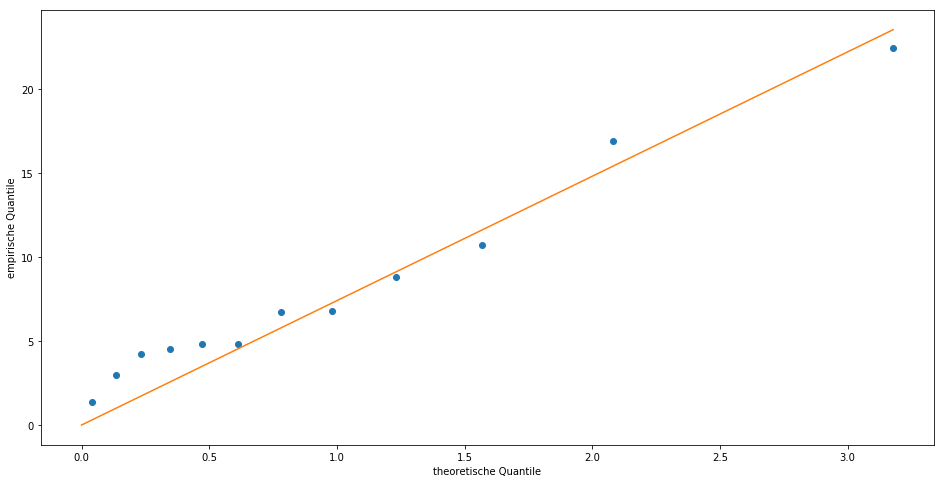

In [12]:
import numpy as np
import scipy.stats as st
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [16, 8]

y = np.sort([16.9, 4.2, 6.7, 8.83, 10.7, 22.4, 1.37, 3.0, 4.82, 4.53, 6.77, 4.81])
alpha_k = (np.arange(1, len(y)+1) - 0.5) / len(y)
x = -np.log(1 - alpha_k)
plt.plot(x, y, 'o')
plt.xlabel('theoretische Quantile')
plt.ylabel('empirische Quantile')

x1 = np.linspace(0, np.max(x))
y1 = x1 * 7.4 # 7.4 will be calculated further down
plt.plot(x1, y1)

plt.show()

Sind die Daten $Exp(\lambda)$ verteilt, sollte die Gerade eine Steigung von $\frac{1}{\lambda}$ haben, und gelten: $x_{(k)} \approx q_{a_k}$ und folglich:

$$ \frac{x_{(k)}}{-log(1-\alpha_k)} \approx \frac{1}{\lambda} $$

Die Steigung der Regressionsgeraden kann mit der Methode der kleinsten Quadrate geschätzt werden:

In [19]:
x2 = x[:, np.newaxis]
a, _, _, _ = np.linalg.lstsq(x2, y, rcond=None)
print('a={:.3f}'.format(a[0]))

a=7.421


# 5.5

(fakultativ)

## a)

$$ F_X(x) = 1 - e^{-\lambda x} $$

$$ 1-u = e^{-\lambda x} $$

$$ log(1-u) = -\lambda x $$

$$ \underline{\underline{x = \frac{1}{-\lambda} log(1-u)}} $$

$$ \underline{\underline{F_X^{-1}(U) = \frac{1}{-\lambda}log(1-u)}} $$

In [41]:
import numpy as np
from scipy.stats import uniform

def f(u, l):
    return 1 / -l * np.log(1-u)

n = 1000
l = 2

u = uniform.rvs(0, 1, n)
x = f(u, l)

## b)

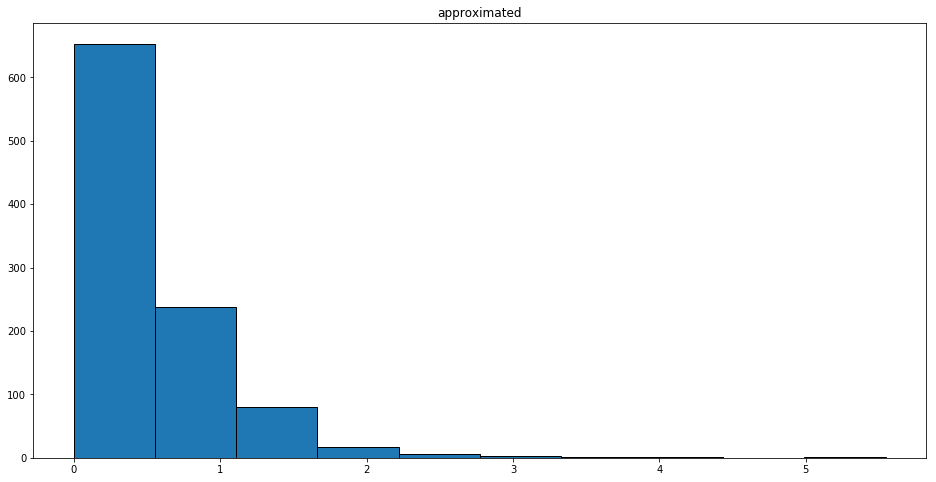

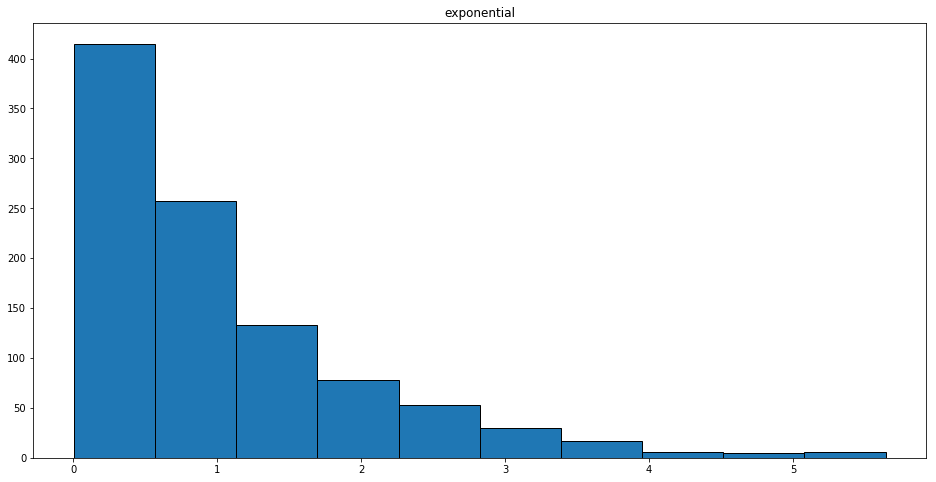

In [44]:
from scipy.stats import expon

y = expon.rvs(0, 1, n)

plt.hist(x, edgecolor='black')
plt.title('approximated')
plt.show()

plt.hist(y, edgecolor='black')
plt.title('exponential')
plt.show()

## c)

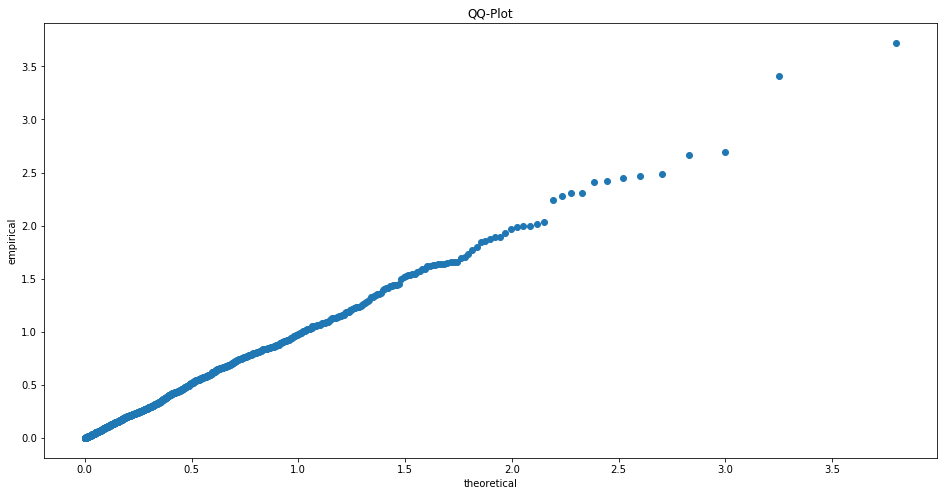

In [53]:
import numpy as np
import pandas as pd
from scipy.stats import uniform, expon

n = 1000
v = uniform.rvs(size=n, loc=0, scale=1)
x = -np.log(v) / 2

theoretical_quantiles = expon.ppf((np.linspace(1, n, n) - 0.5)/n, scale=0.5)
empirical_quantiles = np.sort(x)
plt.plot(theoretical_quantiles, empirical_quantiles, 'o')
plt.xlabel('theoretical')
plt.ylabel('empirical')
plt.title('QQ-Plot')
plt.show()

# 5.6

$$ f(x) = \frac{\alpha}{x^{\alpha}+1}, x \geq 1 $$

$$ f(x) = 0, x, < 1 $$

$$ \alpha > 0, \alpha=? $$

## a)

$n$ Beobachtungen, $x_1,x_2,\dots,x_n$, $l$: Likelihood-Funktion, $log(l)$: log-Likelihood-Funktion

$$ l(\alpha; x_1,\dots,x_n) = \alpha\frac{1}{x_1^{\alpha+1}} \cdot \alpha\frac{1}{x_2^{\alpha+1}} \cdots \alpha\frac{1}{x_n^{\alpha+1}} = \alpha^n\frac{1}{(\prod^n_{i=1} x_i)^{\alpha+1}} $$

$$ log(l)(\alpha, x_1, \dots, x_n) = n \cdot log(\alpha) - (\alpha + 1) \sum_{i=1}^n log(x_i) $$

## b)

$$ x_1=12.0, x_2=4.0, x_3=6.9, x_4=27.9, x_5=15.4 $$

Lösung: $log(l)$ ableiten und $=0$ setzen!

$$ \hat{\alpha}_{MLE} = \frac{n}{\sum_{i=1}^n log(x_i)} = \frac{5}{log(12.0)+log(4.0)+log(6.9)+log(27.9)+log(15.4)} \approx 0.4 $$

## c)

gesucht: Momentenschätzer

Erwartungswert:

$$ E[X] = \frac{\alpha}{\alpha-1}, \alpha > 1 $$

mit Stichprobenmittel gleichsetzen:

$$ E[X] = \frac{1}{n}\sum_{i=1}^n x$$

$$ \hat{\alpha}_{MoM} = \frac{\overline{x}}{\overline{x}-1} = \frac{13.24}{13.24-1}  \approx 1.01 $$

## d)

Vergleich $\hat{\alpha}_{MLE}$ mit $\hat{\alpha}_{MoM}$: $\hat{\alpha}_{MoM}$ setzt $\alpha>1$ voraus, doch $\hat{\alpha}_{MLE}$ ist deutlich $<1$. Darum ist $\hat{\alpha}_{MoM}$ wenig plausibel.

# 5.7

$$ f(x)=0, x \leq 0 $$

$$ f(x)=\frac{1}{\sqrt{2\pi}\sigma} \cdot e^{-\frac{(log(x)-1)^2}{2\sigma^2}}, x > 0 $$

$$ x_1=1.62, x_2=5.29, x_3=3.93, x_4=1.49, x_5=1.57 $$

$$ E[X] = e^{1+\frac{\sigma^2}{2}} $$

$$ \sigma > 0, \sigma = ? $$

## a)

Likelihood-Funktion:

$$ l(\sigma; x_1, \dots, x_n) = \frac{1}{\prod_{i=1}^n x_i (2\pi\sigma^2)^{\frac{n}{2}}} \cdot exp \Big(-\sum_{i=1}^n \frac{(log(x_i)-1)^2}{2\sigma^2}\Big) $$

Log-Likelihood-Funktion:

$$ log(l)(\sigma; x_1, \dots, x_n) = log(1) - \sum_{i=1}^n log(x_i) - \frac{n}{2}log(2\pi) -n\cdot log(\sigma) - \sum_{i=1}^n \frac{(log(x_i)-1)^2}{2\sigma^2} $$

ableiten, gleich null setzen:

$$ \frac{\mathcal{df}}{\mathcal{d\sigma}} \Big|_{\hat{\sigma}} = -\frac{n}{\hat{\sigma}} + \frac{1}{\hat{\sigma}^3} \sum_{i=1}^n (log(x_i)-1)^2 = 0 $$

nach $\hat{\sigma}$ auflösen:

$$ \frac{n}{\hat{\sigma}} = \frac{\sum_{i=1}^n (log(x_i)-1)^2}{\hat{\sigma}^3} \Leftrightarrow \hat{\sigma} = \sqrt{\frac{\sum_{i=1}^n (log(x_i)-1)^2}{n}} $$

$$ \hat{\sigma}_{MLE} = \sqrt{\frac{(log(1.62)-1)^2 + (log(5.29)-1)^2 + (log(3.93)-1)^2 + (log(1.49)-1)^2 + (log(1.57)-1)^2}{5}} \approx 0.550 $$

## b)

gesucht: Momentenschätzer

aus $E[X]=\mathcal{e}^{1+\frac{\sigma^2}{2}}$ (gegeben) und $E[X]=\frac{1}{n}\sum_{i=1}^n x_i$ (Definition) erhält man durch Gleichsetzen und auflösen nach $\sigma$ den Momentenschätzer:

$$ \mathcal{e}^{1+\frac{\sigma^2}{2}}=\frac{1}{n}\sum_{i=1}^n x_i \quad \big| \quad \mathcal{log} $$

$$ 1+\frac{\sigma^2}{2} = log\Big(\frac{1}{n}\sum_{i=1}^n x_i\Big) \quad \big| \quad -1 $$

$$ \frac{\sigma^2}{2} = log\Big(\frac{1}{n}\sum_{i=1}^n x_i\Big) - 1 \quad \big| \quad \cdot 2 $$

$$ \sigma^2 = 2 \cdot log\Big(\frac{1}{n}\sum_{i=1}^n x_i\Big) - 2 \quad \big| \quad \sqrt{} $$

$$ \sigma = \sqrt{2 \cdot log\Big(\frac{1}{n}\sum_{i=1}^n x_i\Big) - 2} $$

$$ \hat{\sigma}_{MoM} = \sqrt{2 \cdot log\Big( \frac{1.62+5.29+3.93+1.49+1.57}{5} -2 \Big)} \approx 0.212 $$

## c)

Da der Momentenschätzer nicht für alle Fälle definiert ist, ist der Maximum-Likelihood-Schätzer zu bevorzugen.

Beispiel für nicht definierten Momentenschätzer ($n=1$):

$$ \hat{\sigma}_{MoM} = \sqrt{2 \cdot log\Big( \frac{1.62}{1} \Big) - 2} = \sqrt{ -1.04 } $$